In [ ]:
# 1. Stochastic Gradient Discent ->  single sample as our batch size, very slow, noisy and might not provide a good solution
# 2. Batch Gradient Discent -> All training sample as our batch size, very fast, no noise and again not a good solution as out gradient might settle, not ideal for real world, reqires max memory
# 3. Mini Batch Gradient Discent -> Best but we need to worry about hyper parameter tuning, experiment with it

# # conculude -> smaller batch sizes are better -> 32, 64, 128
# # focus on leaning curves to identify

# The wrong batch size is all it takes

This notebook contains a few experiments to train a neural network using Gradient Descent with different batch sizes.

[Here is a full article](https://articles.bnomial.com/the-wrong-batch-size-is-all-it-takes) explaining how different batch sizes influence the training process of neural networks using gradient descent.

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers

Let's start by creating a random dataset consisting of 2 features and 3 different classes. We will split the data in 80% training and 20% testing.

In [ ]:
n = 1000
classes = 3
dimensions = 2

train_size = int(n * 0.8)

X, y = make_blobs(
    n_samples=n,
    centers=classes,
    n_features=dimensions,
    cluster_std=2,
    random_state=42
)

X_train, X_test = X[:train_size, :], X[train_size:, :]
y_train, y_test = y[:train_size], y[train_size:]

These are a few functions that will help us create the three experiments so we don't have to repeat the code over and over again.

In [ ]:
def fit_model(batch_size):
    model = models.Sequential([
        layers.Dense(32, input_dim=dimensions, activation="relu"),
        layers.Dense(classes, activation="softmax")
    ])

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=batch_size
    )

    return model, history


def evaluate(model, history):
    _, train_accuracy = model.evaluate(X_train, y_train)
    _, test_accuracy = model.evaluate(X_test, y_test)

    print(f"Trainining accuracy: {train_accuracy:.2f}")
    print(f"Testing accuracy: {test_accuracy:.2f}")

    plt.figure(figsize=(6, 4), dpi=160)

    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend()
    plt.show()


# Experiment 1: Stochastic Gradient Descent

`batch_size = 1`

Using a single sample of data on every iteration is called "Stochastic Gradient Descent."





Epoch 1/100
800/800 [==============================] - 2s 3ms/step - loss: 0.2217 - accuracy: 0.9200 - val_loss: 0.1572 - val_accuracy: 0.9500
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1603 - accuracy: 0.9438 - val_loss: 0.1364 - val_accuracy: 0.9600
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1474 - accuracy: 0.9550 - val_loss: 0.2602 - val_accuracy: 0.9350
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1666 - accuracy: 0.9450 - val_loss: 0.1166 - val_accuracy: 0.9650
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1396 - accuracy: 0.9550 - val_loss: 0.2246 - val_accuracy: 0.9450
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1962 - accuracy: 0.9513 - val_loss: 0.2102 - val_accuracy: 0.9450
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.1599 - accuracy: 0.9438 - val_loss: 0.1988 - val_accuracy: 0.9500

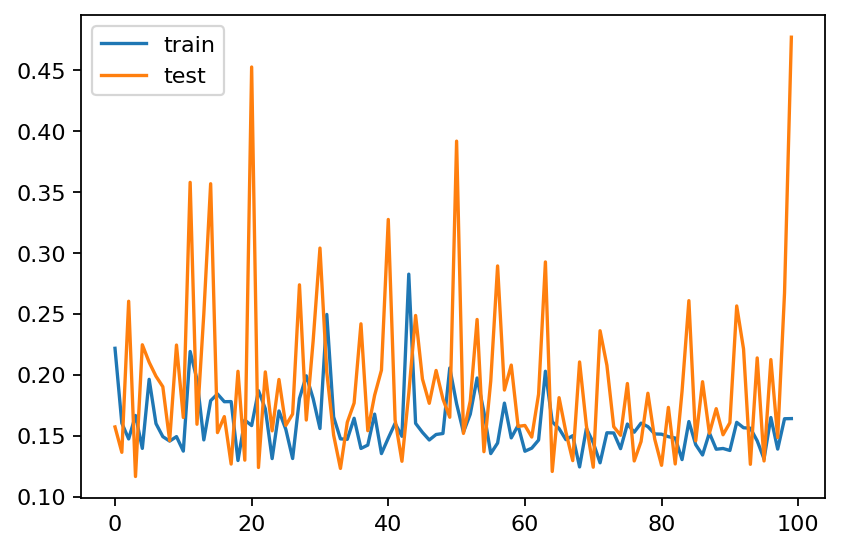

3min 22s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 1 -r 1

model, history = fit_model(batch_size=1)
evaluate(model, history)

# Experiment 2: Batch Gradient Descent

`batch_size = n`

Using all the data at once is called "Batch Gradient Descent."

Epoch 1/100
1/1 [==============================] - 0s 376ms/step - loss: 3.1312 - accuracy: 0.3313 - val_loss: 2.2548 - val_accuracy: 0.3400
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 2.3477 - accuracy: 0.3313 - val_loss: 1.0707 - val_accuracy: 0.3800
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 1.1097 - accuracy: 0.3600 - val_loss: 0.3250 - val_accuracy: 0.9950
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.3312 - accuracy: 0.9887 - val_loss: 0.2000 - val_accuracy: 0.9750
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 0.2008 - accuracy: 0.9650 - val_loss: 0.2081 - val_accuracy: 0.9450
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 0.2083 - accuracy: 0.9413 - val_loss: 0.2277 - val_accuracy: 0.9250
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 0.2282 - accuracy: 0.9250 - val_loss: 0.2352 - val_accuracy: 0.9200
Epoch 8/100
1/1 [==

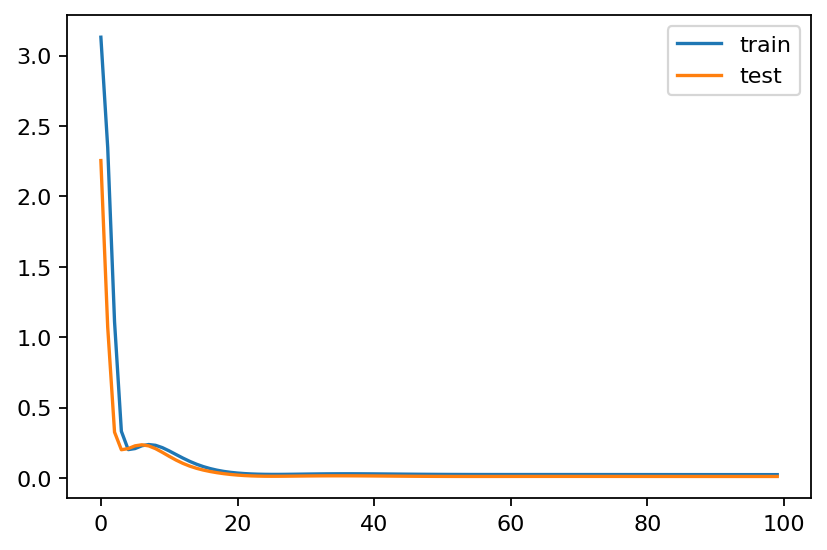

4.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 1 -r 1

model, history = fit_model(batch_size=train_size)
evaluate(model, history)

# Experiment 3: Mini-Batch Gradient Descent

`batch_size = 32`

Using some data (more than one sample but fewer than the entire dataset) is called "Mini-Batch Gradient Descent."

In this case, we are going to use 32 samples.

Epoch 1/100
25/25 [==============================] - 0s 9ms/step - loss: 0.3858 - accuracy: 0.8712 - val_loss: 0.1718 - val_accuracy: 0.9400
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1722 - accuracy: 0.9225 - val_loss: 0.1624 - val_accuracy: 0.9400
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1538 - accuracy: 0.9350 - val_loss: 0.1546 - val_accuracy: 0.9400
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1445 - accuracy: 0.9312 - val_loss: 0.1425 - val_accuracy: 0.9450
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1379 - accuracy: 0.9375 - val_loss: 0.1366 - val_accuracy: 0.9500
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9425 - val_loss: 0.1344 - val_accuracy: 0.9550
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1294 - accuracy: 0.9438 - val_loss: 0.1297 - val_accuracy: 0.9550
Epoch 8/100
2

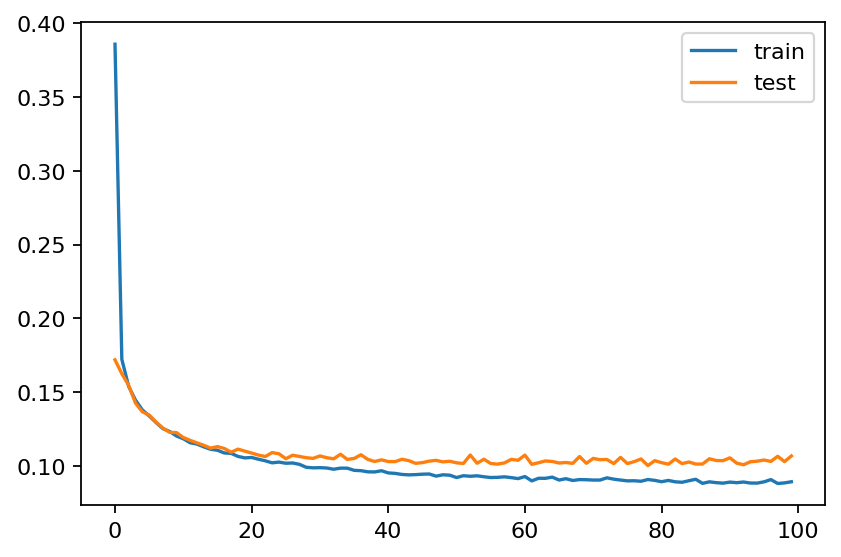

10.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n 1 -r 1

model, history = fit_model(batch_size=32)
evaluate(model, history)